In [1]:
import numpy as np

import pandas as pd

import quaternion
from scipy.spatial.transform import Rotation as R

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
! ls data

data_132574489412995799_.txt      prep_data_132574489412995799_.csv


In [3]:
file_name = 'data_132574489412995799_'

In [4]:
data = pd.read_csv('./data/{0}.txt'.format(file_name), sep=' ')
data = data[3:]

In [5]:
data[1062:]

,Time,Status,StatusInt,ConvergeDistance,LeftDirX,LeftDirY,LeftDirZ,RightDirX,RightDirY,RightDirZ,...,GlobalLeftDirZ,GlobalRightDirX,GlobalRightDirY,GlobalRightDirZ,GlobalLeftOrigX,GlobalLeftOrigY,GlobalLeftOrigZ,GlobalRightOrigX,GlobalRightOrigY,GlobalRightOrigZ
1065,2978974,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049297,1.267127,-0.089602,0.010102,1.267956,-0.088961
1066,2978983,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049297,1.267127,-0.089602,0.010102,1.267956,-0.088961
1067,2978991,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049297,1.267127,-0.089602,0.010102,1.267956,-0.088961
1068,2978999,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049164,1.267172,-0.089499,0.010214,1.268289,-0.088628
1069,2979008,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049164,1.267172,-0.089499,0.010214,1.268289,-0.088628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,3512025,14,14,0,-0.162796,-0.138885,0.976822,-0.102356,-0.167694,0.980499,...,0.839006,0.199347,-0.522477,0.829013,-0.008713,1.636674,0.557042,0.049143,1.649401,0.559827
61301,3512033,14,14,0,-0.163330,-0.138840,0.976746,-0.103821,-0.182877,0.977631,...,0.839006,0.199347,-0.522477,0.829013,-0.008713,1.636674,0.557042,0.049143,1.649401,0.559827
61302,3512042,14,14,0,-0.167343,-0.139420,0.975983,-0.104904,-0.173172,0.979279,...,0.838513,0.191695,-0.539975,0.819551,-0.008611,1.636844,0.556365,0.049246,1.649611,0.559020
61303,3512050,14,14,0,-0.181946,-0.146698,0.972290,-0.106506,-0.172852,0.979157,...,0.838513,0.191695,-0.539975,0.819551,-0.008611,1.636844,0.556365,0.049246,1.649611,0.559020


In [6]:
#  'Time', - внутреннее время окологрофа в мс делим на 1000 частота = 120Грц 
#  'Status', - значение енама 
#  'StatusInt', - енам числом 
#  'SphereRadius', - не должно было быть 
#  'SphereDistance', - не должно было быть  сдивгаем имена колонок 
#  'ConvergeDistance', - расстояние сведение глаз 
#  'LeftDirX', - направление вгляда y - вверх, тройка леdвая , x - вправо 
#  'LeftDirY', 
#  'LeftDirZ', 
#  'RightDirX',
#  'RightDirY', 
#  'RightDirZ', 
#  'LeftOrigX', - положение точки отсчета взгляда (центр взгляда )
#  'LeftOrigY', 
#  'LeftOrigZ',
#  'RightOrigX', 
#  'RightOrigY', 
#  'RightOrigZ', 
#  'PupilSizeL', - размер зрачка мл 
#  'PupilSizeR',
#  'HeadPosX', - положение головы, координата шлема 
#  'HeadPosY', 
#  'HeadPosZ', 
#  'HeadRotX', - кваратанион поворота 
#  'HeadRotY', 
#  'HeadRotZ',
#  'HeadRotW', 
#  'GlobalLeftDirX', - в глобальной системе координат 
#  'GlobalLeftDirY', 
#  'GlobalLeftDirZ',
#  'GlobalRightDirX', 
#  'GlobalRightDirY', 
#  'GlobalRightDirZ',
#  'GlobalLeftOrigX', 
#  'GlobalLeftOrigY', 
#  'GlobalLeftOrigZ',
#  'GlobalRightOrigX', 
#  'GlobalRightOrigY', 
#  'GlobalRightOrigZ'],

In [7]:
#def coor_as_angle(Z, X, Y):
#    hyp = np.sqrt(Z**2 + X**2 + Y**2)
#
#    alpha = Z / hyp
#    angle = np.arccos(alpha) 
#    return angle

def coor_as_angle(X, Y, Z):
    yaw = np.arctan2(X, Y)
    pitch = np.arctan2(Z, np.sqrt((X * X) + (Y * Y)))
    return yaw, pitch

def coor_as_angle(X, Y, Z):
    #yaw = 57.2958 * np.arctan2(X, Z)
    #pitch = 57.2958 * np.arctan2(Y, np.sqrt((X * X) + (Z * Z)))
    yaw = np.arctan2(X, Z)
    pitch = np.arctan2(Y, np.sqrt((X * X) + (Z * Z)))
    return yaw, pitch

#def coor_as_angle(data, X, Y, Z):
#    rots = data[[X, Y, Z]]
#    r = R.from_rotvec(rots.to_numpy().reshape(-1, 3))
#    angle = r.as_euler('zyx', degrees=True)
#
#    angle = pd.DataFrame(angle)
#    return angle

In [8]:
#left_angle = coor_as_angle(data, 'LeftDirX', 'LeftDirY', 'LeftDirZ') 
#right_angle = coor_as_angle(data, 'RightDirX', 'RightDirY', 'RightDirZ')
left_yaw, left_pitch = coor_as_angle(data.LeftDirX, data.LeftDirY, data.LeftDirZ) 
right_yaw, right_pitch = coor_as_angle(data.RightDirX, data.RightDirY, data.RightDirZ) 

left_yaw, left_pitch

(3        0.115131
 4        0.114485
 5        0.115022
 6        0.114312
 7        0.114102
            ...   
 61300   -0.165141
 61301   -0.165686
 61302   -0.169810
 61303   -0.184992
 61304   -0.163358
 Length: 61302, dtype: float64,
 3       -0.108781
 4       -0.108997
 5       -0.108720
 6       -0.108690
 7       -0.109242
            ...   
 61300   -0.139338
 61301   -0.139291
 61302   -0.139876
 61303   -0.147231
 61304   -0.138552
 Length: 61302, dtype: float64)

In [9]:
data

,Time,Status,StatusInt,ConvergeDistance,LeftDirX,LeftDirY,LeftDirZ,RightDirX,RightDirY,RightDirZ,...,GlobalLeftDirZ,GlobalRightDirX,GlobalRightDirY,GlobalRightDirZ,GlobalLeftOrigX,GlobalLeftOrigY,GlobalLeftOrigZ,GlobalRightOrigX,GlobalRightOrigY,GlobalRightOrigZ
3,2969601,Pause,0,0,0.114197,-0.108566,0.987503,0.146530,-0.106018,0.983505,...,0.980115,-0.153310,-0.155756,0.975813,-0.051652,1.266094,-0.083705,0.007579,1.267519,-0.082873
4,2969610,Pause,0,0,0.113556,-0.108780,0.987549,0.146744,-0.105682,0.983505,...,0.980115,-0.153310,-0.155756,0.975813,-0.051652,1.266094,-0.083705,0.007579,1.267519,-0.082873
5,2969618,Pause,0,0,0.114090,-0.108505,0.987518,0.147430,-0.105179,0.983459,...,0.980046,-0.153761,-0.155198,0.975836,-0.051652,1.266094,-0.083704,0.007583,1.267492,-0.082799
6,2969626,Pause,0,0,0.113388,-0.108475,0.987595,0.147278,-0.105286,0.983459,...,0.980046,-0.153761,-0.155198,0.975836,-0.051652,1.266094,-0.083704,0.007583,1.267492,-0.082799
7,2969643,Pause,0,0,0.113174,-0.109024,0.987564,0.145370,-0.104767,0.983810,...,0.980046,-0.153761,-0.155198,0.975836,-0.051652,1.266094,-0.083704,0.007583,1.267492,-0.082799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,3512025,14,14,0,-0.162796,-0.138885,0.976822,-0.102356,-0.167694,0.980499,...,0.839006,0.199347,-0.522477,0.829013,-0.008713,1.636674,0.557042,0.049143,1.649401,0.559827
61301,3512033,14,14,0,-0.163330,-0.138840,0.976746,-0.103821,-0.182877,0.977631,...,0.839006,0.199347,-0.522477,0.829013,-0.008713,1.636674,0.557042,0.049143,1.649401,0.559827
61302,3512042,14,14,0,-0.167343,-0.139420,0.975983,-0.104904,-0.173172,0.979279,...,0.838513,0.191695,-0.539975,0.819551,-0.008611,1.636844,0.556365,0.049246,1.649611,0.559020
61303,3512050,14,14,0,-0.181946,-0.146698,0.972290,-0.106506,-0.172852,0.979157,...,0.838513,0.191695,-0.539975,0.819551,-0.008611,1.636844,0.556365,0.049246,1.649611,0.559020


In [10]:
print('Statistics yaw\n left:  mean={0}, std={1};\n right: mean={2}, std={3}'.format(
                                                                            np.mean(left_yaw), np.std(left_yaw),
                                                                            np.mean(right_yaw), np.std(right_yaw) 
                                                                                ))

print('\nStatistics pitch\n left:  mean={0}, std={1};\n right: mean={2}, std={3}'.format(
                                                                            np.mean(left_pitch), np.std(left_pitch),
                                                                            np.mean(right_pitch), np.std(right_pitch) 
                                                                                ))

Statistics yaw
 left:  mean=-0.02078309263048741, std=0.16848876013504208;
 right: mean=0.03719794850777578, std=0.17126385237209701

Statistics pitch
 left:  mean=-0.11485403524198068, std=0.09916430996769751;
 right: mean=-0.12471362590251577, std=0.10180361410027265


In [11]:
# data.HeadRotW.T, data.HeadRotX.T, data.HeadRotY.T, data.HeadRotZ.T
rots = data[['HeadRotW', 'HeadRotX', 'HeadRotY', 'HeadRotZ']]
r = R.from_quat(rots.to_numpy().reshape(-1, 4))
rot_as_angle = r.as_euler('zyx', degrees=False)

rot_angle =  pd.DataFrame(rot_as_angle)

rot_angle

,0,1,2
0,-0.048186,0.008878,-3.125607
1,-0.048186,0.008878,-3.125607
2,-0.048186,0.008878,-3.125607
3,-0.048186,0.008878,-3.125607
4,-0.048186,0.008878,-3.125607
...,...,...,...
61297,-0.421989,-0.053905,-2.946020
61298,-0.421989,-0.053905,-2.946020
61299,-0.419618,-0.055830,-2.946162
61300,-0.419618,-0.055830,-2.946162


In [12]:
test_data = data[['HeadPosY', 'HeadPosZ',
                  'LeftDirY', 'LeftDirZ',
                  'RightDirY', 'RightDirZ',
                  'GlobalLeftDirY', 'GlobalLeftDirZ', 
                  'GlobalRightDirY', 'GlobalRightDirZ',
                  'GlobalLeftOrigY', 'GlobalLeftOrigZ',
                  'GlobalRightOrigY', 'GlobalRightOrigZ']].copy()

test_data['left_yaw'], test_data['left_pitch'] = left_yaw, left_pitch
test_data['right_yaw'], test_data['right_pitch'] = right_yaw, right_pitch
test_data['rot_angle_z'], test_data['rot_angle_y'] = rot_angle[0].copy(), rot_angle[1].copy()

In [13]:
yaw_left_init = test_data.left_yaw[3]
yaw_right_init = test_data.right_yaw[3]

pitch_left_init = test_data.left_pitch[3]
pitch_right_init = test_data.right_pitch[3]

yaw_left_init, yaw_right_init, pitch_left_init, pitch_right_init

(0.11513056742056758,
 0.14789979863463806,
 -0.10878126146283086,
 -0.10621806668857704)

In [14]:
np.mean(test_data.left_yaw), np.std(test_data.left_yaw)

(-0.02078309263048741, 0.16848876013504208)

In [41]:
print("""
lef_yaw: min={0}, max={1}
right_yaw: min={2}, max={3}

left_pitch: min={4}, max={5}
right_pitch: min={6}, max={7}

rot_angle_z: min={8}, max={9},
rot_angle_y: min={10}, max={11}
""".format(min(left_yaw), max(left_yaw),
           min(right_yaw), max(right_yaw),
           min(left_pitch), max(left_pitch),
           min(right_pitch), max(right_pitch),
           min(test_data.rot_angle_z), max(test_data.rot_angle_z),
           min(test_data.rot_angle_y), max(test_data.rot_angle_y)
        ))


lef_yaw: min=-0.6833511165544398, max=0.6903553965394401
right_yaw: min=-0.6787330917443611, max=0.692909537819533

left_pitch: min=-0.46219647071439507, max=0.3305743984621296
right_pitch: min=-0.4840888862200436, max=0.3601718360930255

rot_angle_z: min=-0.4528974102016372, max=0.11498893130179866,
rot_angle_y: min=-0.6582189166593668, max=0.8364533959906684



In [16]:
test_data.left_yaw

3        0.115131
4        0.114485
5        0.115022
6        0.114312
7        0.114102
           ...   
61300   -0.165141
61301   -0.165686
61302   -0.169810
61303   -0.184992
61304   -0.163358
Name: left_yaw, Length: 61302, dtype: float64

In [17]:
def bias_pi(r, init_val):
    r_ = r + (init_val*init_val)/init_val # init_val - начальное измерение
    #mod = abs(r_) % (2*np.pi) # остаток по модулю
    #res = (mod * abs(r_)) / r_ # сохранение знака
    
    return r_

test_data.left_yaw = test_data.left_yaw.apply(bias_pi, args=(yaw_left_init,))
test_data.right_yaw = test_data.right_yaw.apply(bias_pi, args=(yaw_right_init,))

test_data.left_pitch = test_data.left_pitch.apply(bias_pi, args=(pitch_left_init,))
test_data.right_pitch = test_data.right_pitch.apply(bias_pi, args=(pitch_right_init,))

In [18]:
test_data.left_yaw

3        0.230261
4        0.229615
5        0.230153
6        0.229442
7        0.229232
           ...   
61300   -0.050010
61301   -0.050555
61302   -0.054679
61303   -0.069861
61304   -0.048227
Name: left_yaw, Length: 61302, dtype: float64

In [19]:
np.mean(test_data.left_yaw), np.std(test_data.left_yaw)

(0.09434747479008018, 0.16848876013504205)

In [20]:
#corr = test_data.corr()

In [21]:
#f, ax = plt.subplots(figsize=(11, 9))

#sns.heatmap(corr, vmax=1, center=0,
#            linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
plot_data = test_data.copy()
plot_data['Time'] = data.Time
plot_data['Status'] = data.Status
plot_data['StatusInt'] = data.StatusInt

plot_data

,HeadPosY,HeadPosZ,LeftDirY,LeftDirZ,RightDirY,RightDirZ,GlobalLeftDirY,GlobalLeftDirZ,GlobalRightDirY,GlobalRightDirZ,...,GlobalRightOrigZ,left_yaw,left_pitch,right_yaw,right_pitch,rot_angle_z,rot_angle_y,Time,Status,StatusInt
3,1.264378,-0.047329,-0.108566,0.987503,-0.106018,0.983505,-0.157472,0.980115,-0.155756,0.975813,...,-0.082873,0.230261,-0.217563,0.295800,-0.212436,-0.048186,0.008878,2969601,Pause,0
4,1.264378,-0.047329,-0.108780,0.987549,-0.105682,0.983505,-0.157472,0.980115,-0.155756,0.975813,...,-0.082873,0.229615,-0.217778,0.296012,-0.212099,-0.048186,0.008878,2969610,Pause,0
5,1.264378,-0.047329,-0.108505,0.987518,-0.105179,0.983459,-0.157971,0.980046,-0.155198,0.975836,...,-0.082799,0.230153,-0.217501,0.296702,-0.211592,-0.048186,0.008878,2969618,Pause,0
6,1.264378,-0.047329,-0.108475,0.987595,-0.105286,0.983459,-0.157971,0.980046,-0.155198,0.975836,...,-0.082799,0.229442,-0.217472,0.296550,-0.211701,-0.048186,0.008878,2969626,Pause,0
7,1.264378,-0.047329,-0.109024,0.987564,-0.104767,0.983810,-0.157971,0.980046,-0.155198,0.975836,...,-0.082799,0.229232,-0.218024,0.294601,-0.211178,-0.048186,0.008878,2969643,Pause,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,1.628254,0.591860,-0.138885,0.976822,-0.167694,0.980499,-0.488857,0.839006,-0.522477,0.829013,...,0.559827,-0.050010,-0.248119,0.043885,-0.274710,-0.419618,-0.055830,3512025,14,14
61301,1.628254,0.591860,-0.138840,0.976746,-0.182877,0.977631,-0.488857,0.839006,-0.522477,0.829013,...,0.559827,-0.050555,-0.248072,0.042100,-0.290131,-0.419618,-0.055830,3512033,14,14
61302,1.628531,0.591142,-0.139420,0.975983,-0.173172,0.979279,-0.488478,0.838513,-0.539975,0.819551,...,0.559020,-0.054679,-0.248658,0.041183,-0.280269,NaN,NaN,3512042,14,14
61303,1.628531,0.591142,-0.146698,0.972290,-0.172852,0.979157,-0.488478,0.838513,-0.539975,0.819551,...,0.559020,-0.069861,-0.256013,0.039552,-0.279945,NaN,NaN,3512050,14,14


In [23]:
def plot_table(value, a, b):
    fig, axs = plt.subplots(3, 2, figsize=(18, 11))
    fig.suptitle('Vertically stacked subplots')

    axs[0, 0].plot(plot_data.Time[a:b], plot_data[value][a:b])
    
    if value == 'HeadPosZ':
        axs[0, 1].plot(plot_data.Time[a:b], plot_data['rot_angle_z'][a:b])
        axs[0, 1].set_title('rot_angle_z')
    else:
        axs[0, 1].plot(plot_data.Time[a:b], plot_data['rot_angle_y'][a:b])
        axs[0, 1].set_title('rot_angle_y')
        
    axs[1, 0].plot(plot_data.Time[a:b], plot_data['left_yaw'][a:b])
    axs[1, 1].plot(plot_data.Time[a:b], plot_data['left_pitch'][a:b])
    axs[2, 0].plot(plot_data.Time[a:b], plot_data['right_yaw'][a:b])
    axs[2, 1].plot(plot_data.Time[a:b], plot_data['right_pitch'][a:b])

    axs[0, 0].set_title(value) 
    axs[1, 0].set_title('left_yaw')
    axs[1, 1].set_title('left_pitch')
    axs[2, 0].set_title('right_yaw')
    axs[2, 1].set_title('right_pitch')


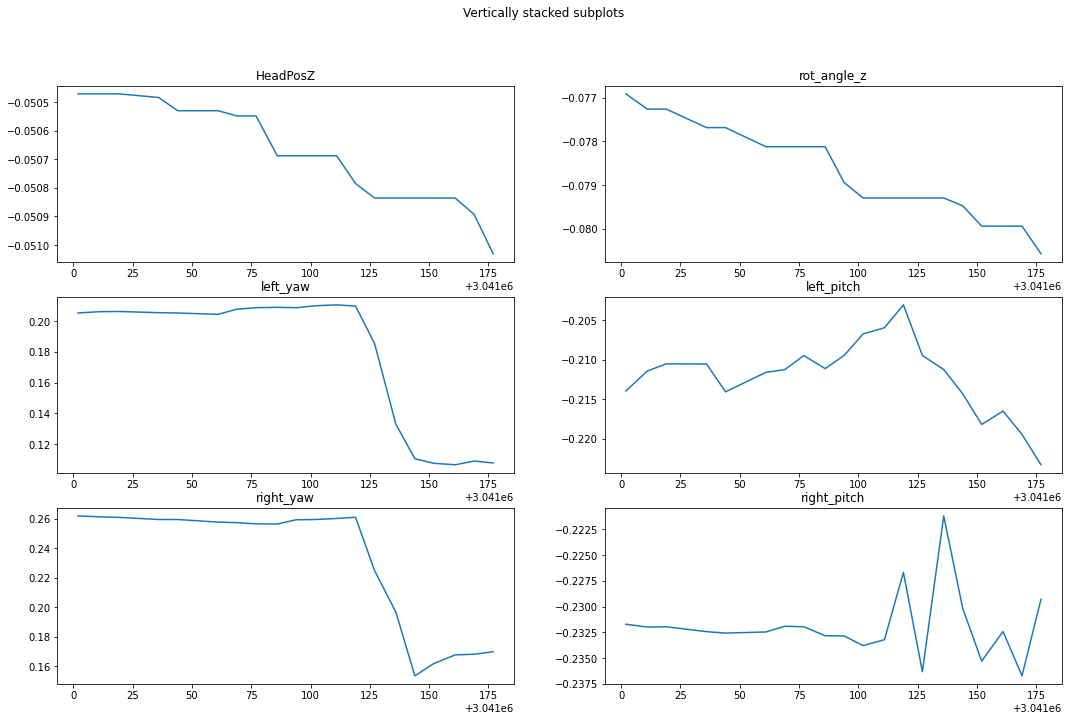

In [44]:
plot_table('HeadPosZ', 8100, 8120)

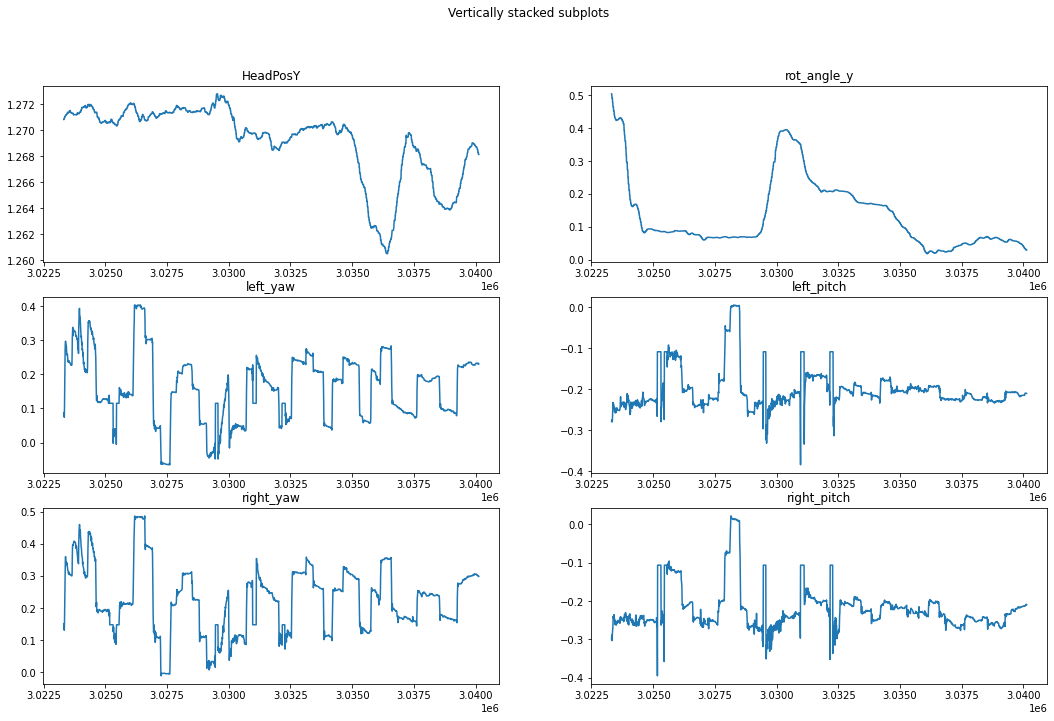

In [38]:
plot_table('HeadPosY', 6100, 8000)

In [42]:
plot_data.to_csv('./data/prep_{0}.csv'.format(file_name), index=False)

In [27]:
plot_data.Status.unique()

array(['Pause', 'SittingLinearFwdBwd', 'SittingLinearLftRgt',
       'SittingLinearClckwise', 'Pause3', 'SittingRotationHead',
       'SittingRotationBody', 'Pause2', 'MovingLinearFwdBwd',
       'MovingLinearLftRgt', 'MovingLinearClockwise', 'Pause4',
       'MovingRotationLegs', 'MovingRotationBody', '14'], dtype=object)